In [18]:
import pandas as  pd
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import OneHotEncoder


data = pd.read_csv('C:/Users/NAVYA .P/Desktop/360digitmg_assignments/5th assignment/Autoinsurance.csv')
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [19]:
# removing unwanted columns
data.drop(['Customer','Effective To Date','Renew Offer Type'], axis =1, inplace = True)

In [26]:
# one hot encoding
data = pd.get_dummies(data)
data.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'State_Arizona', 'State_California', 'State_Nevada', 'State_Oregon',
       'State_Washington', 'Response_No', 'Response_Yes', 'Coverage_Basic',
       'Coverage_Extended', 'Coverage_Premium', 'Education_Bachelor',
       'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Disabled', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Gender_F', 'Gender_M',
       'Location Code_Rural', 'Location Code_Suburban', 'Location Code_Urban',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Policy Type_Corporate Auto',
       'Policy Type_Personal Auto', 'Policy Type_Special 

In [20]:
# standardization 
df = StandardScaler().fit_transform(data[['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies','Total Claim Amount']])
df = pd.DataFrame(df)


In [10]:
df.head()

,0,1,2,3,4,5,6,7
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843


In [21]:
df.columns = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']

In [23]:
df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843
...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.811934
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.227937
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.885113


In [27]:
x = data[['State_Arizona', 'State_California', 'State_Nevada', 'State_Oregon',
       'State_Washington', 'Response_No', 'Response_Yes', 'Coverage_Basic',
       'Coverage_Extended', 'Coverage_Premium', 'Education_Bachelor',
       'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Disabled', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Gender_F', 'Gender_M',
       'Location Code_Rural', 'Location Code_Suburban', 'Location Code_Urban',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Policy Type_Corporate Auto',
       'Policy Type_Personal Auto', 'Policy Type_Special Auto',
       'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
       'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
       'Policy_Special L1', 'Policy_Special L2', 'Policy_Special L3',
       'Sales Channel_Agent', 'Sales Channel_Branch',
       'Sales Channel_Call Center', 'Sales Channel_Web',
       'Vehicle Class_Four-Door Car', 'Vehicle Class_Luxury Car',
       'Vehicle Class_Luxury SUV', 'Vehicle Class_SUV',
       'Vehicle Class_Sports Car', 'Vehicle Class_Two-Door Car',
       'Vehicle Size_Large', 'Vehicle Size_Medsize', 'Vehicle Size_Small']]
x.head()

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [28]:
stand_data = pd.concat([df, x], axis=1)
stand_data.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640,0,0,...,0,0,0,0,0,0,1,0,1,0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734,0,0,...,0,0,0,0,0,0,1,0,1,0
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769,0,1,...,0,0,0,0,1,0,0,0,1,0
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843,0,0,...,0,1,0,0,0,0,0,0,1,0


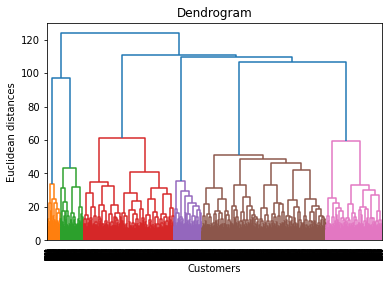

In [17]:
# Dendogram
%matplotlib inline
dendrogram = sch.dendrogram(sch.linkage(stand_data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [29]:
# Now applying AgglomerativeClustering choosing 5 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering

h_complete = AgglomerativeClustering(n_clusters = 4, linkage = 'complete', affinity = "euclidean").fit(stand_data) 
h_complete.labels_

cluster_labels = pd.Series(h_complete.labels_)

stand_data['clust'] = cluster_labels # creating a new column and assigning it to new column 

stand_data = stand_data.iloc[:,[61,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,
                 40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]]
stand_data.head()

,clust,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,3,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640,0,...,0,0,0,0,0,0,1,0,1,0
1,1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737,1,...,0,1,0,0,0,0,0,0,1,0
2,3,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734,0,...,0,0,0,0,0,0,1,0,1,0
3,3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769,0,...,0,0,0,0,1,0,0,0,1,0
4,3,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843,0,...,0,1,0,0,0,0,0,0,1,0
